In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("final_cleaned")

In [17]:
df=df.rename(columns={'Complaint':'Time','Complaint.1':'Complaint'})

In [18]:
df.Complaint.size

269395

In [11]:
df=pd.read_csv('coms.csv')

In [5]:
df.Complaint.value_counts()

YMisc. Cause                                       47944
Malfunctioning of Electrical Equipment             44346
Maintenance / Cleanliness                          42005
Punctuality of Train                               39848
Non availability of Water Sub                      22743
Catering and Vending Services                      17303
Unauthorised passengers in coaches                 13227
Reservation/Enquiry_Office Issues                  11998
Bedroll Complaints                                  9714
Improper behaviour of non railway/railway staff     7089
Booking of Luggage / Parcels / Goods                6321
Feedback/Suggestions                                2295
Thefts / Pilferages                                 1545
Bribery and corruption                               882
Emergency Assistance                                 504
Name: Complaint, dtype: int64

In [64]:
#dropping classes
df=df[df.Complaint!="Accident Claims"]
df=df[df.Complaint!="Feedback&Suggestions"]
df=df[df.Complaint!="Complaint Related To Kolkata Metro"]
#df=df[df.Complaint!="\N"]
df=df[df.Complaint!="Security"]
df=df[df.Complaint!="WIFI Service"]
df=df[df.Complaint!="Publicity"]
df=df[df.Complaint!="Complaints related to Sleeper Class"]
df=df[df.Complaint!="YMisc. Cause"]
df=df[df.Complaint!="khuch nahi"]

In [65]:
#combinining classes
df.Complaint.replace(["Passenger Booking","Reservation Issues","Working of Enquiry Offices","Allotment of seats - berths by train staff","Refund of tickets"],"Reservation/Enquiry_Office Issues",inplace=True)
df.Complaint.replace(["Maintenance / Cleanliness of coaches","Cleanliness at Station"],"Maintenance / Cleanliness",inplace=True)
df.Complaint.replace(["Improper behaviour of commercial staff","Improper behaviour of non commercial staff","Improper behaviour of non railway staff"],"Improper behaviour of non railway/railway staff",inplace=True)
#df.Complaint.replace("Unknown","Misc. Cause",inplace=True)

In [66]:
df=df[df.Complaint!="Parking"]
df=df[df.Complaint!="Retiring Room (ONLINE)"]
df=df[df.Complaint!="Multiple complaints"]


In [67]:
df.Complaint.value_counts()

Malfunctioning of Electrical Equipment             44346
Maintenance / Cleanliness                          42005
Punctuality of Train                               39848
Non availability of Water Sub                      22743
Catering and Vending Services                      17303
Unauthorised passengers in coaches                 13227
Reservation/Enquiry_Office Issues                  11998
Bedroll Complaints                                  9714
Improper behaviour of non railway/railway staff     7089
Booking of Luggage / Parcels / Goods                6321
Feedback/Suggestions                                2295
Thefts / Pilferages                                 1545
Bribery and corruption                               882
Emergency Assistance                                 504
Name: Complaint, dtype: int64

In [68]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Text,Time,Complaint,Sub-Complaint,clean_text,clean_list,complaint_id
1,1,1,Sr. Citizen discount fare in tatkal sewa from ...,2013-08-27 16:00:28,Reservation/Enquiry_Office Issues,Any Other Issues (Enquiry),sr citizen discount fare tatkal sewa jammu delhi,"[sr, citizen, discount, fare, tatkal, sewa, ja...",11
2,2,2,RATS ARE PRESENT IN COACH B1 OF TRAIN NUMBER 1...,2013-08-14 21:12:49,Maintenance / Cleanliness,Cockroaches,rat present coach train number ranakpur expres...,"[rat, present, coach, train, number, ranakpur,...",7
3,3,3,12003 coach e1 toilet no 3 leaking vinay pnr 2...,2013-08-27 18:31:57,Maintenance / Cleanliness,A/C & Electrical fittings- Loose,coach toilet leak vinay pnr,"[coach, toilet, leak, vinay, pnr]",7
7,7,7,Train no . 12321 pnr no 6122312493 complain _ ...,2013-08-27 20:22:41,Catering and Vending Services,Overcharging (Catering),train pnr complain pentry car meal prize rs.mi...,"[train, pnr, complain, pentry, car, meal, priz...",3
8,8,8,Train no . 12321 pnr no 6122312493 complain _ ...,2013-08-27 20:22:41,Catering and Vending Services,Overcharging (Catering),train pnr complain pentry car meal prize rs.mi...,"[train, pnr, complain, pentry, car, meal, priz...",3


In [69]:
arr=np.unique(df.Complaint.values)

In [70]:
com_dict=dict([(v,k) for k,v in dict(enumerate(arr)).items()])

In [71]:
df['complaint_id']=df['Complaint'].map(com_dict)

In [73]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import itertools, string, operator, re, unicodedata, nltk
from operator import itemgetter
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk.tokenize
import numpy as np
from itertools import combinations
from gensim.models import Phrases
from collections import Counter

#Contraction map
c_dict = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "I would",
  "i'd've": "I would have",
  "i'll": "I will",
  "i'll've": "I will have",
  "i'm": "I am",
  "i've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}


In [74]:
add_stop = ['', ' ', 'say', 's', 'u', 'ap', 'afp', '...', 'n', '\\','..']

stop_words = ENGLISH_STOP_WORDS.union(add_stop)

In [75]:
lemmatizer = WordNetLemmatizer()
punc = list(set(string.punctuation))
tokenizer = TweetTokenizer()


In [76]:
def casual_tokenizer(text): #Splits words on white spaces (leaves contractions intact) and splits out trailing punctuation
    tokens = tokenizer.tokenize(text)
    return tokens

In [77]:
def get_word_net_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [78]:
def lemma_wordnet(tagged_text):
    final = []
    for word, tag in tagged_text:
        wordnet_tag = get_word_net_pos(tag)
        if wordnet_tag is None:
            final.append(
                lemmatizer.lemmatize(word))
        else:
            final.append(lemmatizer.lemmatize(word, pos=wordnet_tag))
    return final

In [79]:
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))
def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)

In [80]:
def process_text(text):
    
    tokenized = casual_tokenizer(text)
    lower = [item.lower() for item in tokenized]
    decontract = [expandContractions(item, c_re=c_re) for item in lower]
    tagged = nltk.pos_tag(decontract)
    lemma = lemma_wordnet(tagged)
    no_num = [re.sub('[0-9]+', '', each) for each in lemma]
    no_punc = [w for w in no_num if w not in punc]
    no_stop = [w for w in no_punc if w not in stop_words]
    cleaned=[w for w in no_stop if len(w)>1]
    text_new=" ".join(cleaned)
    return text_new

In [81]:
def word_count(text):
    return len(str(text).split(' '))

In [82]:

def word_freq(clean_text_list, top_n):
    """
    Word Frequency
    """
    flat = [item for sublist in clean_text_list for item in sublist]
    with_counts = Counter(flat)
    top = with_counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T

def word_freq_bigrams(clean_text_list, top_n):
    """
    Word Frequency With Bigrams
    """
    bigram_model = Phrases(clean_text_list, min_count=2, threshold=1)
    w_bigrams = list(bigram_model[clean_text_list])
    flat_w_bigrams = [item for sublist in w_bigrams for item in sublist]
    with_counts = Counter(flat_w_bigrams)
    top = with_counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T


def bigram_freq(clean_text_list, top_n):
    bigram_model = Phrases(clean_text_list, min_count=2, threshold=1)
    w_bigrams = list(bigram_model[clean_text_list])
    flat_w_bigrams = [item for sublist in w_bigrams for item in sublist]
    bigrams = []
    for each in flat_w_bigrams:
        if '_' in each:
            bigrams.append(each)
    counts = Counter(bigrams)
    top = counts.most_common(top_n)
    word = [each[0] for each in top]
    num = [each[1] for each in top]
    return pd.DataFrame([word, num]).T

In [83]:


#Apply the function to preprocess the text. Tokenize, lower, expand contactions, lemmatize, remove punctuation, numbers and stop words

df['clean_text'] = df['Text'].apply(process_text)
df.head()



,Unnamed: 0,Unnamed: 0.1,Text,Time,Complaint,Sub-Complaint,clean_text,clean_list,complaint_id
1,1,1,Sr. Citizen discount fare in tatkal sewa from ...,2013-08-27 16:00:28,Reservation/Enquiry_Office Issues,Any Other Issues (Enquiry),sr citizen discount fare tatkal sewa jammu delhi,"[sr, citizen, discount, fare, tatkal, sewa, ja...",11
2,2,2,RATS ARE PRESENT IN COACH B1 OF TRAIN NUMBER 1...,2013-08-14 21:12:49,Maintenance / Cleanliness,Cockroaches,rat present coach train number ranakpur expres...,"[rat, present, coach, train, number, ranakpur,...",7
3,3,3,12003 coach e1 toilet no 3 leaking vinay pnr 2...,2013-08-27 18:31:57,Maintenance / Cleanliness,A/C & Electrical fittings- Loose,coach toilet leak vinay pnr,"[coach, toilet, leak, vinay, pnr]",7
7,7,7,Train no . 12321 pnr no 6122312493 complain _ ...,2013-08-27 20:22:41,Catering and Vending Services,Overcharging (Catering),train pnr complain pentry car meal prize rs.mi...,"[train, pnr, complain, pentry, car, meal, priz...",3
8,8,8,Train no . 12321 pnr no 6122312493 complain _ ...,2013-08-27 20:22:41,Catering and Vending Services,Overcharging (Catering),train pnr complain pentry car meal prize rs.mi...,"[train, pnr, complain, pentry, car, meal, priz...",3


In [84]:
df.to_csv('final_cleaned')

In [85]:

##Top 20 most frequent words for all the articles
def reverse_str(text):
    return str(text).split(' ')
df['clean_list']=df['clean_text'].apply(reverse_str)
cl_text_list = df['clean_list'].tolist()
wf = word_freq(cl_text_list, 100)
wf.head(20)



,0,1
0,train,215372
1,coach,95811
2,pnr,94766
3,travel,41415
4,sir,41330
5,seat,40287
6,water,39545
7,work,36186
8,station,36147
9,toilet,33638


In [86]:
def change(list1):
    fullstr=""
    for list2 in list1:
        for word in list2:
            fullstr+=word
            fullstr+=" "
    return fullstr
cl_text_str=change(cl_text_list)

In [87]:
cl_text_str[:100]

'sr citizen discount fare tatkal sewa jammu delhi rat present coach train number ranakpur express run'

In [88]:
import collections
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud,STOPWORDS
#from matplotlib import imshow

In [89]:
stopwords=STOPWORDS
wordclouds=WordCloud(stopwords=stopwords,background_color="white",max_words=1000,collocations = False).generate(cl_text_str)

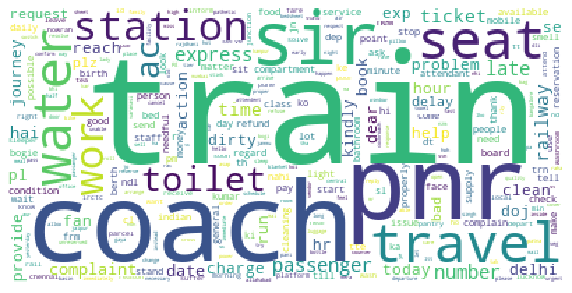

In [90]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordclouds)
plt.axis("off")
plt.savefig('latest.jpeg')
plt.show()

In [91]:
df['word_count'] = df['Text'].apply(word_count)
avg_wc = df.groupby('Complaint').mean().reset_index()
avg_wc[['Complaint','word_count']]

,Complaint,word_count
0,Bedroll Complaints,34.673358
1,Booking of Luggage / Parcels / Goods,44.880240
2,Bribery and corruption,55.412698
3,Catering and Vending Services,40.425129
4,Emergency Assistance,33.884921
5,Feedback/Suggestions,42.784749
6,Improper behaviour of non railway/railway staff,55.269149
7,Maintenance / Cleanliness,28.856112
8,Malfunctioning of Electrical Equipment,25.293488
9,Non availability of Water Sub,23.947808


In [92]:
#top 20 words by category taking bigrams into account
top_n=20
bigrams=word_freq_bigrams(cl_text_list,20)
bigrams

,0,1
0,train,124326
1,coach,58510
2,pnr,54149
3,pnr_train,22941
4,seat,20718
5,sir,18406
6,passenger,15905
7,station,15025
8,water,14907
9,work,13853


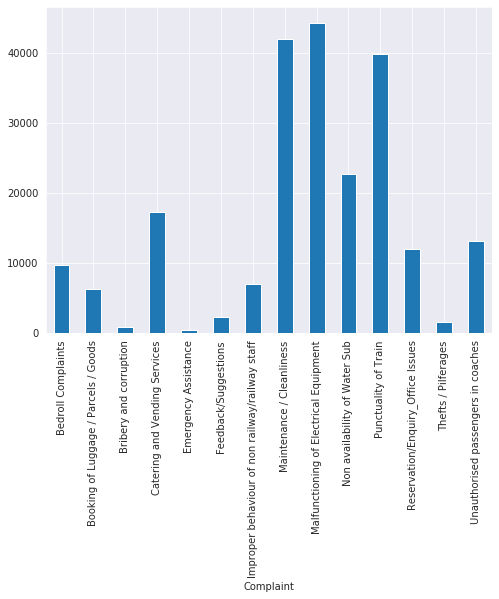

In [95]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,6))
df.groupby('Complaint').Text.count().plot.bar(ylim=0)
plt.savefig('LatestBar.jpeg')

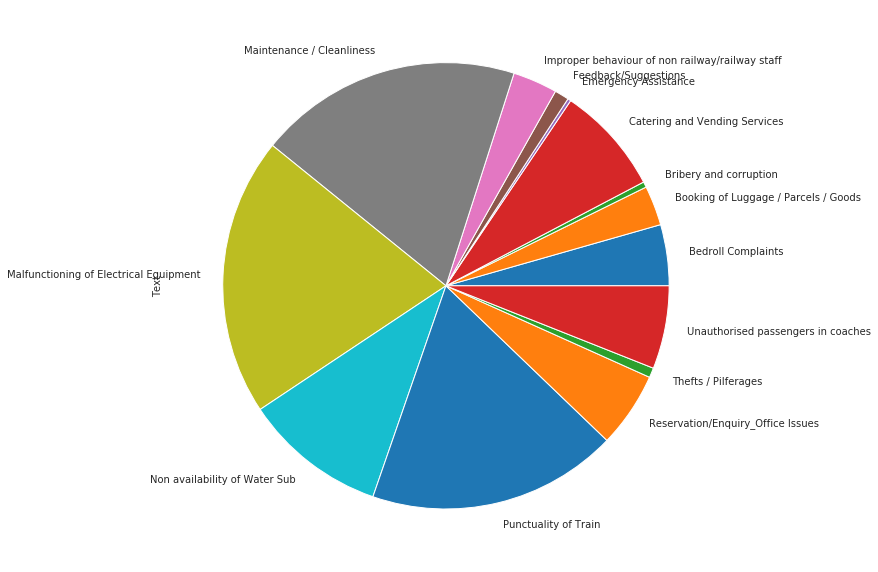

In [96]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,12))
df.groupby('Complaint').Text.count().plot.pie()
plt.savefig('pie.jpeg')

In [97]:
#top 20 words by category 
top_n=20
bigrams1=bigram_freq(cl_text_list,100)
bigrams1

,0,1
0,pnr_train,22941
1,train_number,11832
2,doj_--,9629
3,dear_sir,9111
4,coach_seat,8333
5,ac_work,7984
6,pnr_trn,7925
7,fan_work,6821
8,travel_train,6815
9,water_toilet,6274


In [98]:
wordclouds2=WordCloud(stopwords=stop_words,background_color="white",max_words=1000,collocations = False).generate(" ".join(bigrams1[0]))

In [99]:
data_dict=bigrams1.set_index(0).to_dict()

In [100]:
wordclouds2.generate_from_frequencies(data_dict[1])

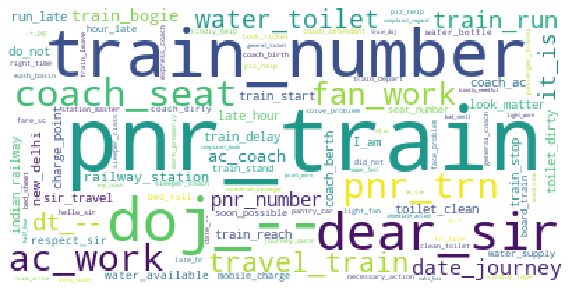

In [101]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordclouds2)
plt.axis("off")
plt.savefig('Latest_bigram1.jpeg')
plt.show()


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1,2),min_df=2,max_df=0.95)
X=tfidf.fit_transform(df['clean_text'].astype('str'))

In [103]:
y=df['complaint_id']
print(X.shape,y.shape)

(219820, 395638) (219820,)


In [104]:

'''Features'''
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import label_binarize

In [105]:
#dimensionality reduction of 100 features
lsa=TruncatedSVD(n_components=100,n_iter=10,random_state=3)
X=lsa.fit_transform(X)
X.shape

(219820, 100)

In [106]:
from imblearn.over_sampling import SMOTE

In [133]:
smote=SMOTE('not majority')

In [134]:
X_sm,y_sm=smote.fit_sample(X,y)

In [135]:
print(X_sm.shape,y_sm.shape)

(620844, 100) (620844,)


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [137]:

'''Classifiers'''
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

'''Metrics/Evaluation'''
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from scipy import interp
from itertools import cycle

'''Plotting'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [151]:

model_dict={'Dummy' : DummyClassifier(random_state=3),
             'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier()
          }

In [152]:
#Function to get the scores for each model in a df
def model_score_df(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df


In [ ]:
model_score_df(model_dict)

/home/anubhav/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [139]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.3,shuffle=True,stratify=y_sm,random_state=3)

In [140]:
clf=model_dict['Random Forest'].fit(X_train,y_train)

/home/anubhav/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [141]:
y_pred=model_dict['Random Forest'].predict(X_test)

In [142]:
accuracy_score(y_test,y_pred)

0.9025041072943399

In [143]:
from sklearn.metrics import confusion_matrix

In [144]:
conf_mat=confusion_matrix(y_test,y_pred)

In [145]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (40,30), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('Latest_con_mat.jpeg')
    return fig

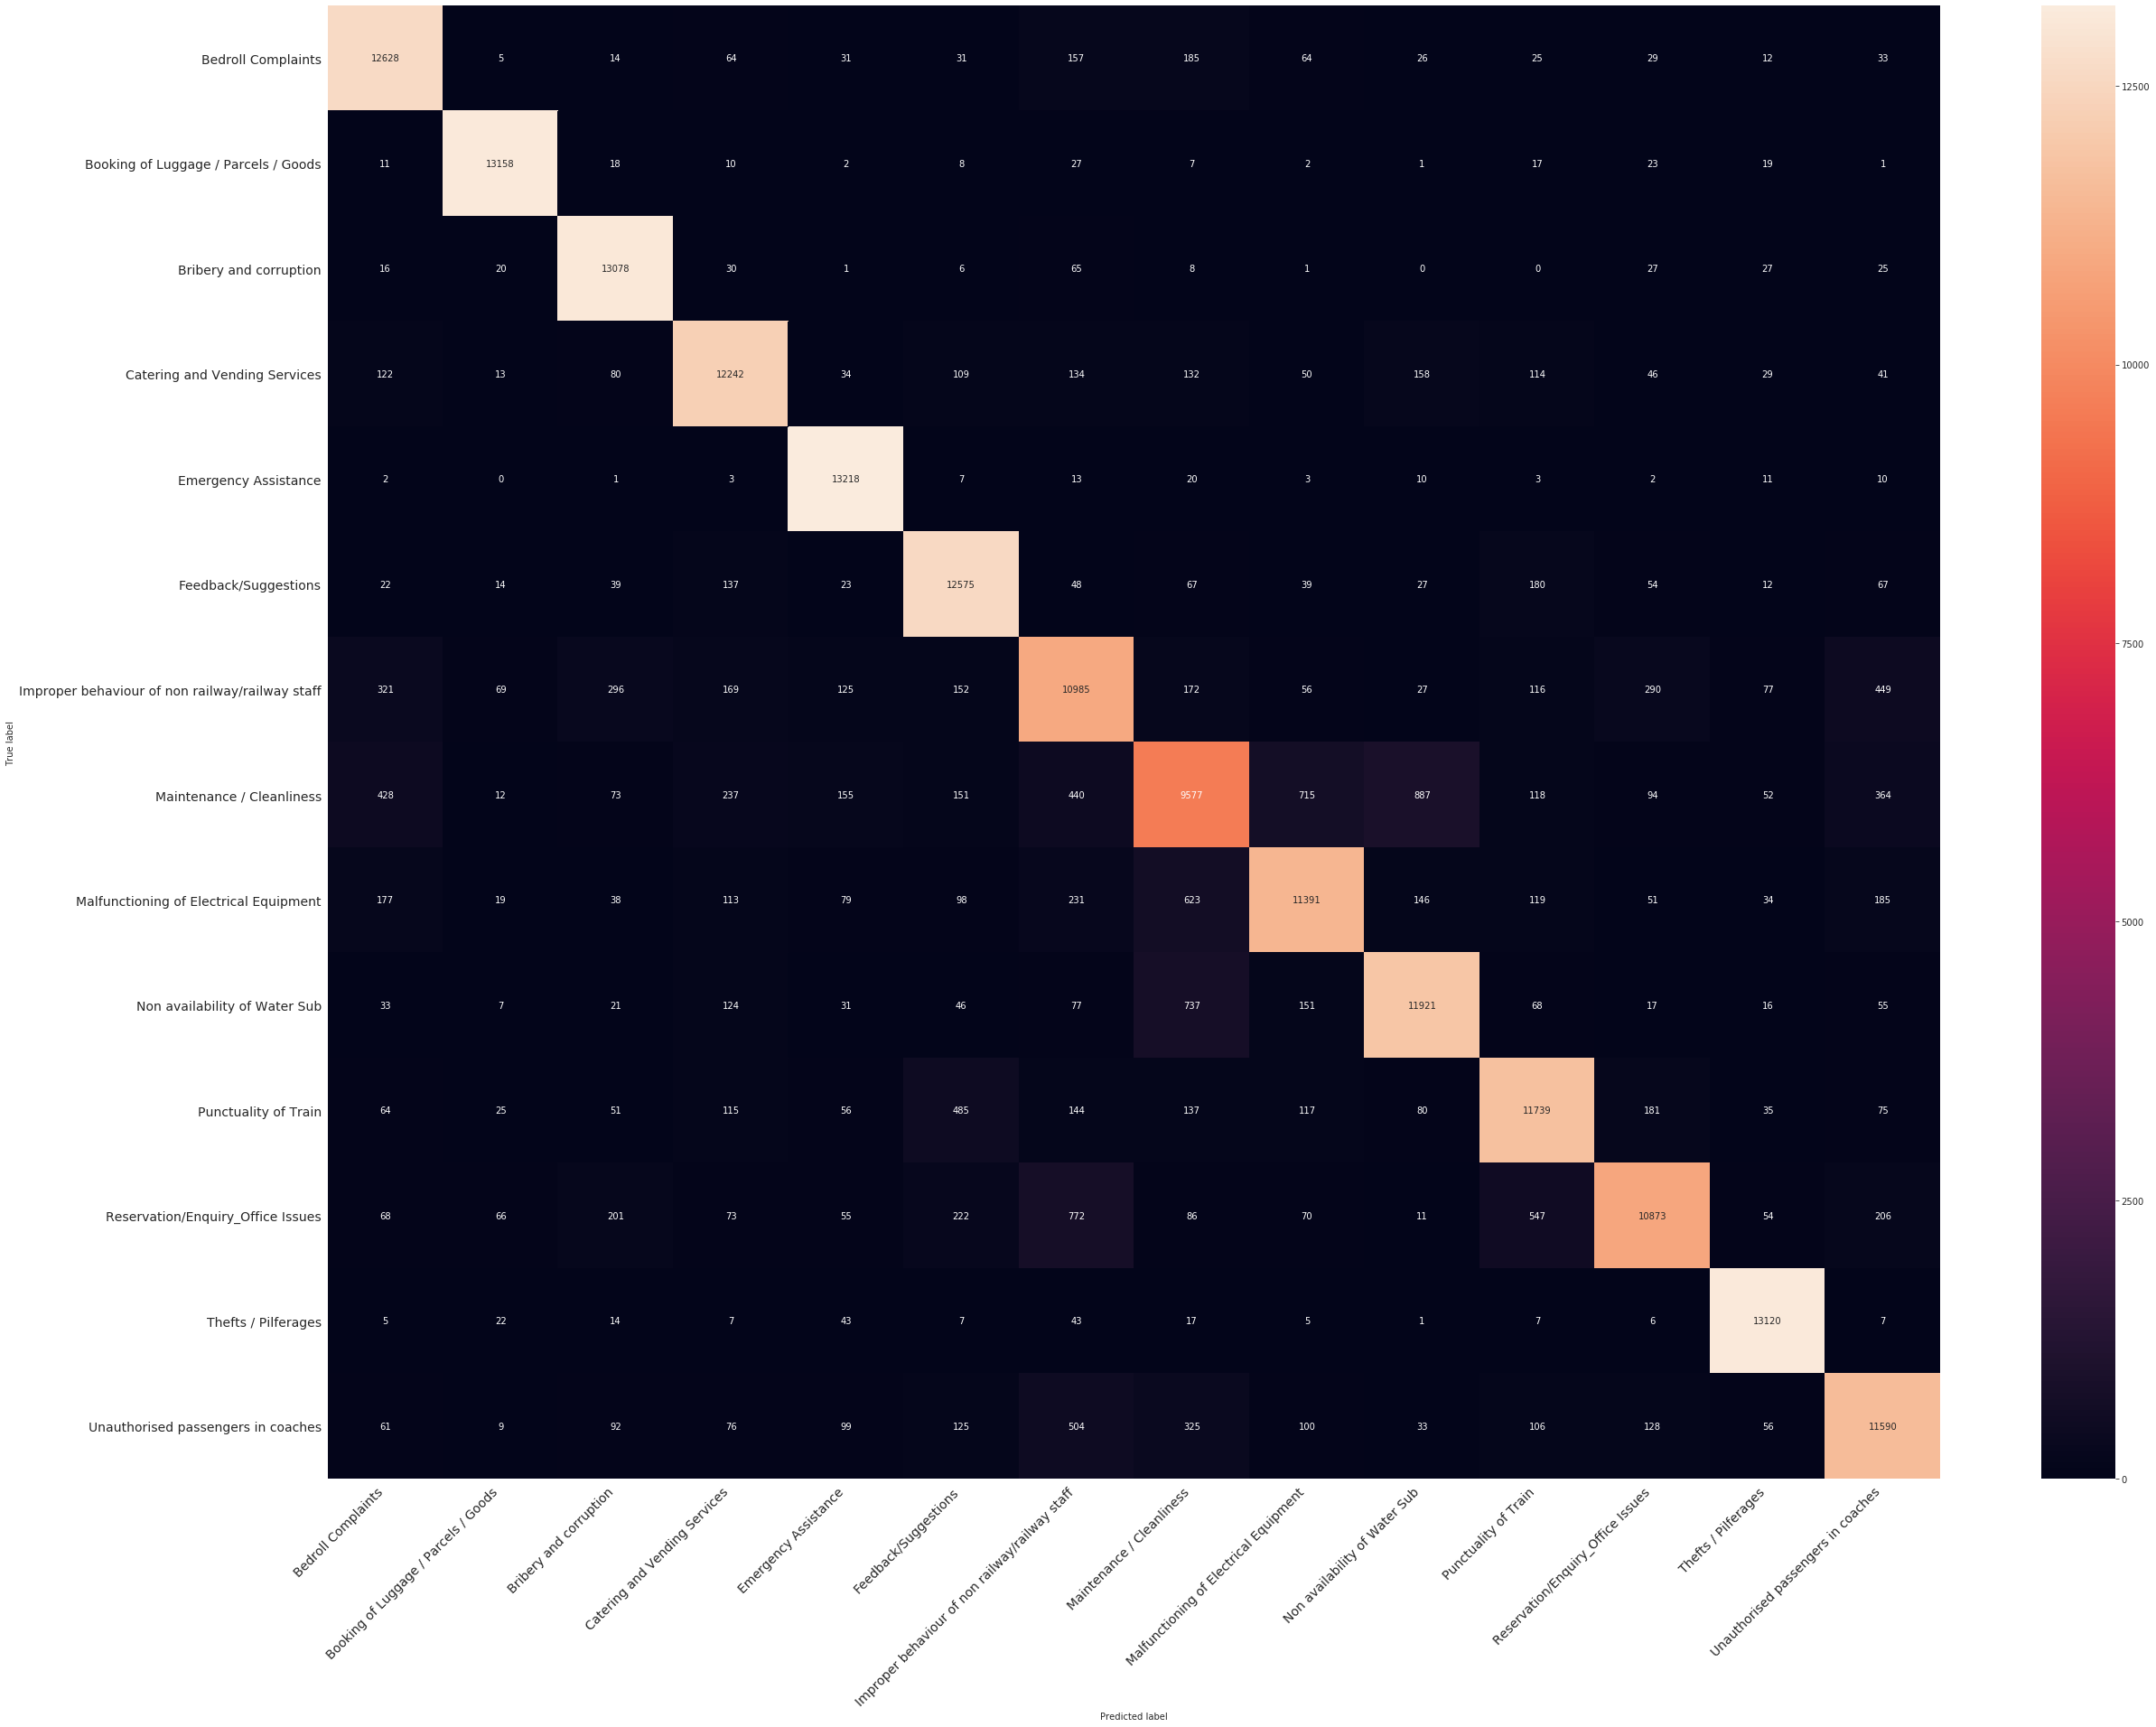

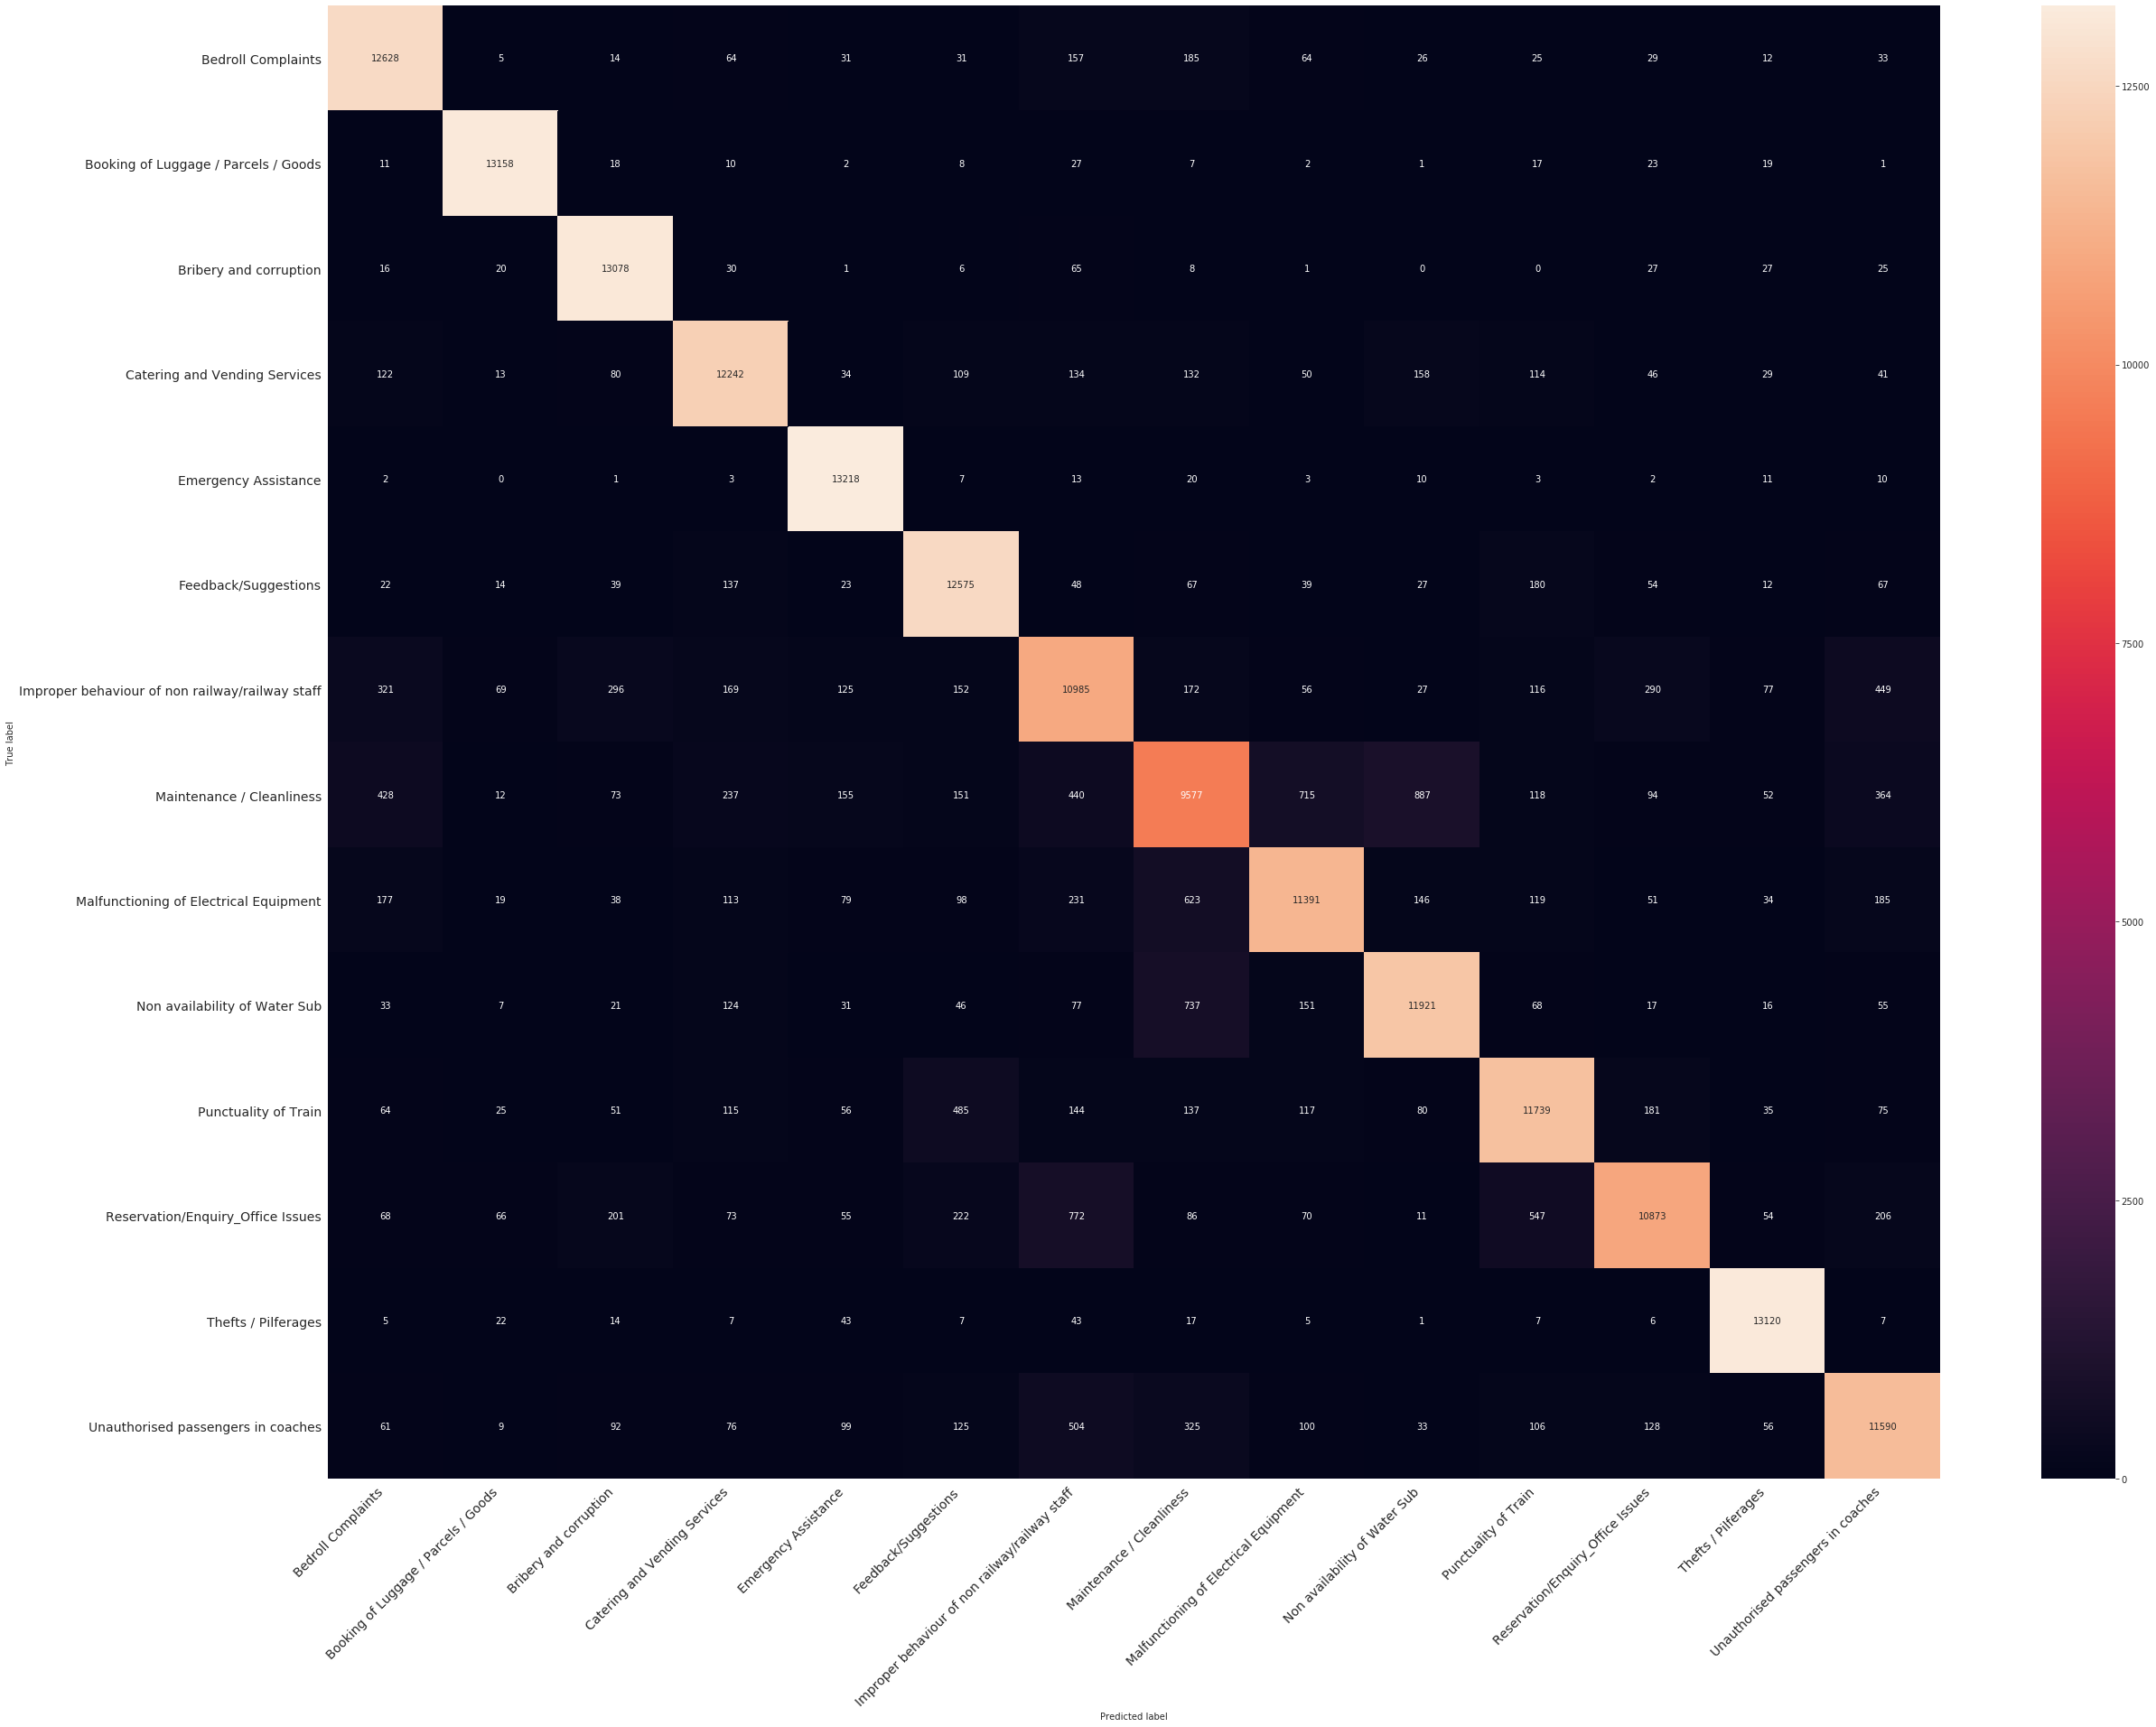

In [146]:
un_arr=np.unique(df.Complaint.values)
print_confusion_matrix(conf_mat,un_arr)


In [147]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred,target_names=un_arr)) 

                                                 precision    recall  f1-score   support

                             Bedroll Complaints       0.90      0.95      0.93     13304
           Booking of Luggage / Parcels / Goods       0.98      0.99      0.98     13304
                         Bribery and corruption       0.93      0.98      0.96     13304
                  Catering and Vending Services       0.91      0.92      0.92     13304
                           Emergency Assistance       0.95      0.99      0.97     13303
                           Feedback/Suggestions       0.90      0.95      0.92     13304
Improper behaviour of non railway/railway staff       0.81      0.83      0.82     13304
                      Maintenance / Cleanliness       0.79      0.72      0.75     13303
         Malfunctioning of Electrical Equipment       0.89      0.86      0.87     13304
                  Non availability of Water Sub       0.89      0.90      0.90     13304
                    

In [148]:
import pickle
with open('90acc','wb') as picklefile:
    pickle.dump(clf,picklefile)

In [ ]:
print(4)